# Gradient Boosting
- Gradient Boosting is a supervised machine learning algorithm
- It is also a sequential model, and it will try to reduce the error at each sequential.

### Training Happen in Sequential model
##### Step 1: 
- The first step is to build a model and make predictions on the given data we will take the avreage of actual value, which is y_pred 

##### Step 2:
- We will find the residual which e1= y-ypred, which will be used further as a target variable 

##### Step 3:
- In the next step, we will build a model on these Residuals(r1) and make the predictions, Here our independent features will be same but the target feature will be r1.

##### Step 4:
- Now we have to update the predictions of model1 which default model by using learning rate, once we will get the new predicted value again we will find residual and this process will repeate again and again. 

###### Update prediction formula :
- final pred= Base_value + ((learning rate * residual1)+ (learning rate * residual2)+.....)

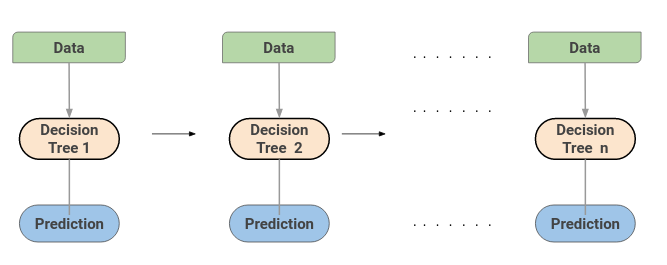

In [1]:
# Coding
# Taking dataset from boston dataset
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import xgboost as xgb 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt


In [2]:
# Loading dataset
boston= load_boston()


In [3]:
#boston variable itself is a dictionary, so you can check for its keys using the .keys() method.
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.feature_names)
print(boston.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

In [5]:
# Making the dataframe 
data= pd.DataFrame(boston.data, columns=(boston.feature_names))
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
data['price']= boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# Creating independet tna dependent features
X= data.iloc[:,:-1]
y=data.iloc[:,-1]

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

#### The trees in XGBoost are built sequentially, trying to correct the errors of the previous trees.
But there are certain features that make XGBoost slightly better than GBM:
- It allow for efficieny gain (Data Metrics)
- XGBoost also includes a variety of regularization techniques that reduce overfitting and improve overall performance. You can select the regularization technique by setting the hyperparameters of the XGBoost algorithm

In [12]:
# Xgboost support matrics, which much faster and effiecent tham pandas dataframe 
# matrics computation is alway faster than Pandas DataFrame 

data_dmatrix= xgb.DMatrix(data= X, label= y)
data_dmatrix

### Hyperparameter tuning in XGBoost:
- **Learning_rate:** (change in slope) step size shrinkage used to prevent overfitting. Range is [0,1], Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems.
- **max_depth:** determines how deeply each tree is allowed to grow during any boosting round. Generally This should be between 3-10.
- **subsample:** percentage of samples used per tree. Low value can lead to underfitting. Typical values range between 0.5-0.9.
- **colsample_bytree:** percentage of features used per tree. High value can lead to overfitting.
- **n_estimators:** number of trees you want to build.
- **objective:** determines the loss function to be used like 
  - **reg:linear** for regression problem.
  -**reg:logistic** for classification problems with only decision, **binary:logistic** for classification problems with probability


### Regualarization Parameters
This step is to apply regularization to reduce overfitting.
- **gamma:** controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- **alpha:** L1 regularization on leaf weights. A large value leads to more regularization.
- **lambda:** L2 regularization on leaf weights and is smoother than L1 regularization.

L1 regularization term on weights (xgb's alpha). for small Dataset
- reg_alpha : Optional[float] [0, 0.001, 0.005, 0.01, 0.05, 0.01, 0.1]

L2 regularization term on weights (xgb's lambda).  for large Datase   
- reg_lambda : Optional[float]
       

In [13]:
#Splitting the Data into Train and Test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20, random_state=42)

In [14]:
#Fitting the XGBoost Model
xg_reg= xgb.XGBRegressor(objective='reg:linear', learning_rate= 0.1, n_estimator= 1000, max_depth= 5, colsample_bytree = 0.3,
                        subsample=0.60, reg_alpha= 0.0001)

## Fittting the model
xg_reg.fit(X_train,y_train)

[13:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimator=1000, n_estimators=100,
             n_jobs=8, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0.0001, reg_lambda=1,
             scale_pos_weight=1, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [15]:
## Predicting the model:
y_pred=xg_reg.predict(X_test)


In [16]:
# Evaluating the model:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: %f" % (rmse))

RMSE: 3.325382


### XGBoost without hyperparameter tuning

In [17]:
# Without hpyerparameter tuning
xg_reg1= xgb.XGBRegressor(n_estimator=10)
## Fittting the model
xg_reg1.fit(X_train,y_train)
## Predicting the model:
y_pred=xg_reg1.predict(X_test)
# Evaluating the model:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: %f" % (rmse))

[13:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE: 2.561353


### Running a adaboost model

In [18]:
ada_reg= AdaBoostRegressor(n_estimators=10)
# Fitting the model
ada_reg.fit(X_train,y_train)
# Predicting the mdel
y_pred= ada_reg.predict(X_test)
#Evaluating the model performance
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: %f" %(rmse))

RMSE: 4.054776


### Cross Validation:

###  K- fold cross validation 
In this resampling technique, the whole data is divided into k sets of almost equal sizes. The first set is selected as the test set and the model is trained on the remaining k-1 sets. The test error rate is then calculated after fitting the model to the test data.

In the second iteration, the 2nd set is selected as a test set and the remaining k-1 sets are used to train the data and the error is calculated. This process continues for all the k sets.

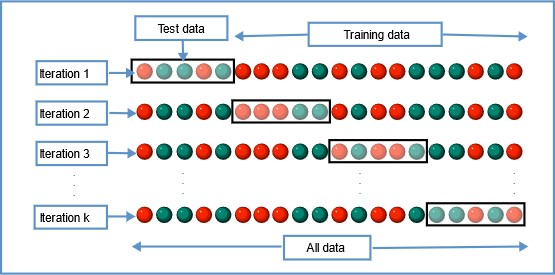

Cross validation hyperparameter tuning
- **num_boost_round:** denotes the number of trees you build (analogous to n_estimators)
- **metrics:** tells the evaluation metrics to be watched during CV
- **as_pandas:** to return the results in a pandas DataFrame.
- **early_stopping_rounds:** finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
- **seed:** for reproducibility of results.


In [19]:
# K-fold cv
params= {"objective":"reg:linear",'colsample_bytree': 0.3,'subsample':0.60, 'learning_rate': 0.1,
                'max_depth': 5, 'reg_alpha': 0.0001}


In [20]:
# Hyperparameter in cross validation 
#dtrain : DMatrix (Data to be trained)
cv_results= xgb.cv(dtrain=data_dmatrix, params= params, nfold=5, 
                  num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[13:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [21]:
# Lets see the result in dataframe 
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.768455,0.163441,21.780757,0.514525
1,19.864557,0.151573,19.926218,0.513319
2,18.142975,0.141174,18.208762,0.548928
3,16.572199,0.153470,16.651180,0.573222
4,15.171541,0.103965,15.314738,0.565944


In [22]:
# Check the shape of cross validation dataframe 
cv_results.shape  # Number of boosting iterations = 100


(100, 4)

In [23]:
# Lets see the last boosting iteration
print((cv_results["test-rmse-mean"]).tail(1))

99    3.653164
Name: test-rmse-mean, dtype: float64


In [24]:
# Now lets train the XGBoost model on given hyperparameter tunnned 
# Paramas
# Data to trained 
# number of boosting itertaion
xg_reg= xgb.train(params= params, dtrain= data_dmatrix, num_boost_round= 100)

[13:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

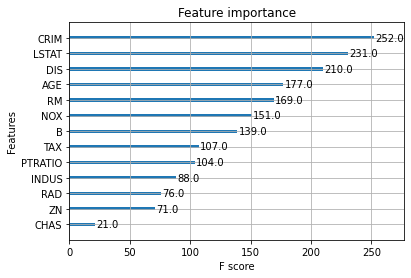

In [25]:
# Lets see the most important featured:
#plt.figure(figsize=(20,20))
xgb.plot_importance(xg_reg)